# Installing and Loading Libraries

In [1]:
# ISTM 4209 Text mining
install.packages("jsonlite", type='source')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("tm") # for text mining

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’




In [3]:
install.packages("SnowballC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
install.packages("wordcloud")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
install.packages("RColorBrewer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages("Rcpp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:

library("tm")
library("SnowballC") # for text stemming
library("wordcloud") # word-cloud generator
library("RColorBrewer") # color palettes
library("Rcpp")

Loading required package: NLP

Loading required package: RColorBrewer



# Importing Text File

In [9]:
text <- read.csv("/content/HubSpot_Reddit_Reviews - Sheet1.csv", header = T)

In [10]:
head(text)

,text
,<chr>
1,"""I’ve been a loyal HubSpot user and advocate for over a decade, but lately, I’ve been disappointed. The customer service has noticeably declined, and features that were once included in our plan are now locked behind higher paywalls. It’s frustrating to see core functionality get gated after years of being available."""
2,"""Marketing ops/revops career long fella here. Hubspot CRM over everything for b2b companies. Hubspot now pulls weight in terms of customizing the UI, creating it to fit the mold of your business vs. forcing your biz to adapt to an out of box setup. I’ve used hs for over a decade and let me tell you, it’s gotten so much better. No need for hs<>salesforce for full commercial teams. Hubspot is expensive, yes, but at what cost? How much more expensive is it to have a shitty crm or duplicate tools that don’t fit business needs but were bought for cost savings instead? The reality is you NEED an ops person who knows hubspot or any crm to have a proper commercial strategy. Businesses that don’t do this really need to reprioritize. For ops folks, it’s not just good enough to know the basics of a platform. You need to be creative, learn how to map tech to business needs, learn how to build integrations that connect to core user databases, grasp basic various schemas, etc. You think hubspot is complicated? 8 years ago deals didn’t even exist. Nor did custom objects, nor did a lot of really incredible marketing features like CTAs, the email interface, etc. Hubspot doesn’t work for some folks because they buy the marketing of the product thinking it will be a game changer. Rather, people should deeply understand their requirements and scope of buying a product before moving forward. No tech or tool will truly make a difference if you buy it with the hope alone that it will make an impact. Business requires deep thinking and strategy, not just buying a tool because you think it will help."""
3,"""Yeah I've seen so many features get pushed to premium subscription, limited functionalities, on the flip side opportunity for Hubspot developers to capitalize on that missing spot. e.g Bulk Duplicate action. Hubspot CMS is something I find very limiting."""
4,"""Prepare to be flooded in dms by shite partners who've never worked in real businesses, only agency world."""
5,"""In my experience there are very little HubSpot workarounds that CANT be completed with a Zapier Pro account, and a good developer."""
6,"""I too hate hubspot. But I don't decide its purchase. I hate the price, the UI, the reps, they are rude and they just want to sell. Zoho is the ultimate solution to Hubspot."""


# Load data as a corpus

In [11]:
# loading the data as a corpus
docs <- Corpus(VectorSource(text))
# Inspect the content of the document
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] c("\\"I’ve been a loyal HubSpot user and advocate for over a decade, but lately, I’ve been disappointed. The customer service has noticeably declined, and features that were once included in our plan are now locked behind higher paywalls. It’s frustrating to see core functionality get gated after years of being available.\\"", "\\"Marketing ops/revops career long fella here. Hubspot CRM over everything for b2b companies. Hubspot now pulls weight in terms of customizing the UI, creating it to fit the mold of your business vs. forcing your biz to adapt to an out of box setup. I’ve used hs for over a decade and let me tell you, it’s gotten so much better. No need for hs<>salesforce for full commercial teams. Hubspot is expensive, yes, but at what cost? How much more expensive is it to have a shitty crm or duplicate tools that don’t fit business needs but were bought for cost savings ins

# Text Transformation

In [12]:
toSpace <- content_transformer(function(x , pattern ) gsub(pattern, " ", x))

# For example, replace “/” with space:
docs <- tm_map(docs, toSpace, "/")


Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
“transformation drops documents”


In [13]:
length(docs)      # number of docs after transformation
inspect(docs[1]) # make sure your text is still there


[1] 1

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1

[1] c("\\"I’ve been a loyal HubSpot user and advocate for over a decade, but lately, I’ve been disappointed. The customer service has noticeably declined, and features that were once included in our plan are now locked behind higher paywalls. It’s frustrating to see core functionality get gated after years of being available.\\"", "\\"Marketing ops revops career long fella here. Hubspot CRM over everything for b2b companies. Hubspot now pulls weight in terms of customizing the UI, creating it to fit the mold of your business vs. forcing your biz to adapt to an out of box setup. I’ve used hs for over a decade and let me tell you, it’s gotten so much better. No need for hs<>salesforce for full commercial teams. Hubspot is expensive, yes, but at what cost? How much more expensive is it to have a shitty crm or duplicate tools that don’t fit business needs but were bought for cost savings ins

# Cleaning Text

In [14]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))

# Remove numbers
docs <- tm_map(docs, removeNumbers)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”


In [15]:
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”


In [16]:
custom_sw <- c(
  "hubspot", "crm", "hs", "salesforce", "zoho", "cms",
  "platform", "software", "tool", "product",
  "team", "business", "company", "clients", "customers", "users",
  "use", "using", "used", "works", "working",
  "thing", "things"
)
# removing own stopwords
docs <- tm_map(docs, removeWords, custom_sw)

Warning message in tm_map.SimpleCorpus(docs, removeWords, custom_sw):
“transformation drops documents”


In [17]:
# Remove punctuations
docs <- tm_map(docs, removePunctuation)

Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”


In [18]:
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)

Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”


In [19]:
# Text stemming
docs <- tm_map(docs, stemDocument)

Warning message in tm_map.SimpleCorpus(docs, stemDocument):
“transformation drops documents”


# Build a term-documented matrix

In [20]:
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
df <- data.frame(word = names(v),freq=v)
head(df, 10)


,word,freq
,<chr>,<dbl>
need,need,15
good,good,9
market,market,8
will,will,8
think,think,7
time,time,7
tool,tool,7
busi,busi,6
custom,custom,6


# Generating the word cloud plot

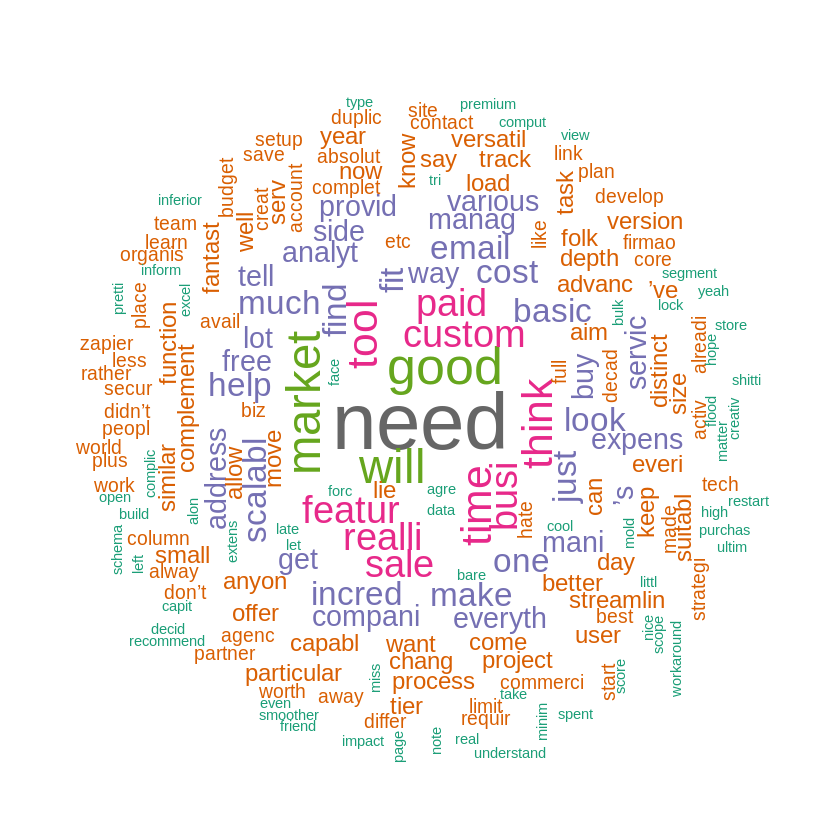

In [21]:
set.seed(1234)
wordcloud(words = df$word, freq = df$freq, min.freq = 1,
	max.words=200, random.order=FALSE, rot.per=0.35,
	colors=brewer.pal(8, "Dark2"))

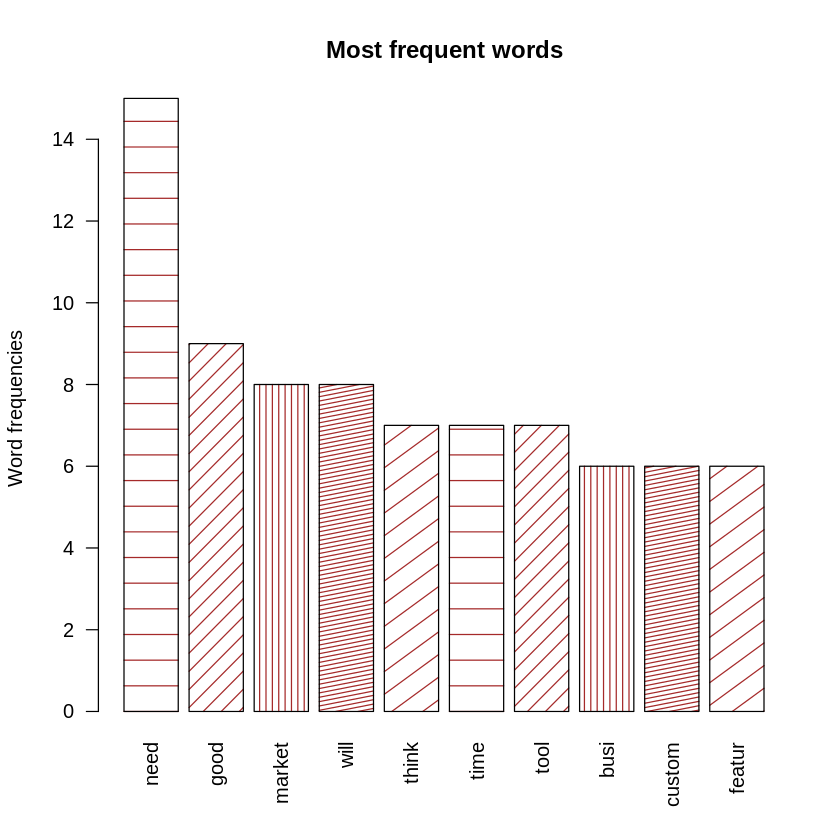

In [22]:
#Use Bar Plot to check the top 10 frequent words
barplot(df[1:10,]$freq, las = 2, names.arg = df[1:10,]$word,
        col ='brown', density=c(5,10,20,30,7) , angle=c(0,45,90,11,36),
        main ="Most frequent words",
        ylab = "Word frequencies")


# Sentiment Analysis

In [23]:
install.packages("syuzhet")
# Extracts Sentiment and Sentiment-Derived Plot Arcs from Text
library(syuzhet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshape’, ‘zoo’, ‘dtt’




In [24]:
# Convert the dataset of reviews as character
reviews <- iconv(text$text, to = 'utf-8')


# Obtain Sentiment Scores

In [25]:
# Obtain sentiment scores
s <- get_nrc_sentiment(reviews)
head(s, 10) # quick view of the dataframe of scores

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,1,1,2,1,4
2,0,5,1,1,3,1,3,4,2,14
3,1,1,0,1,0,2,0,0,2,2
4,0,1,0,0,0,0,0,1,0,2
5,0,1,0,0,1,0,1,2,0,1
6,1,1,1,1,0,2,0,0,1,1
7,0,2,0,1,1,0,1,2,1,2
8,0,1,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,2


# Visualizing Score of Each Sentiment

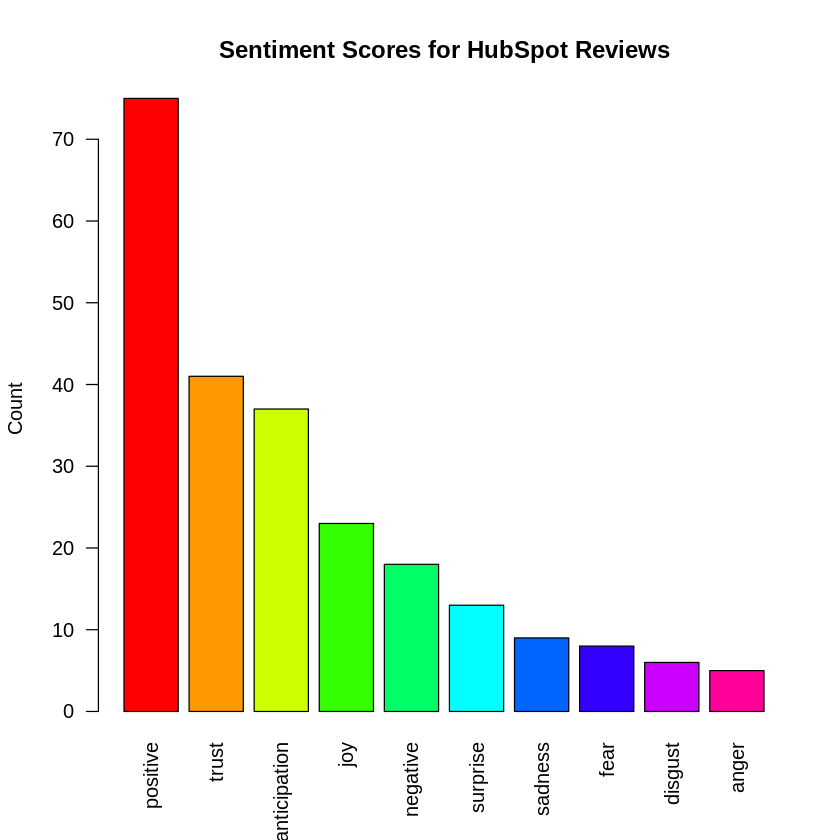

In [27]:
sent_scores <- colSums(s)

# Sort in descending order
sent_scores_sorted <- sort(sent_scores, decreasing = TRUE)

barplot(sent_scores_sorted,
        las = 2,
        col = rainbow(length(sent_scores_sorted)),
        ylab = "Count",
        main = "Sentiment Scores for HubSpot Reviews")
